In [6]:
from scipy import stats
import numpy as np
import math
from matplotlib import pyplot as plt

In [5]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [27]:
m1, m2 = measure(10000)
xmin = m1.min() - 14.0
xmax = m1.max() + 14.0
ymin = m2.min() - 14.0
ymax = m2.max() + 14.0
print(m1.shape)

(10000,)


In [29]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
print(positions.shape)
values = np.vstack([m1, m2])
print(values.shape)
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
print(np.sum(Z) / 100.0 * (xmax-xmin) / 100.0 * (ymax-ymin))

(2, 10000)
(2, 10000)
0.98009051699


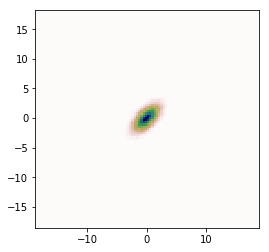

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
           extent=[xmin, xmax, ymin, ymax])
#ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

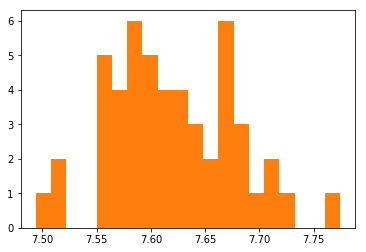

In [8]:
mis = []
for rep in range(50):
    mean = np.random.normal(scale=5.0, size=(500, 5))
    stddev = np.ones(shape=(500, 5)) * 1.0

    values = []
    for k in range(2):
        values.append(mean + stddev * np.random.normal(size=stddev.shape))
    values = np.concatenate(values, axis=0)
    # values = np.random.normal(scale=3.0, size=(1000, 2))
    # Estimate Mutual Information
    kernel = stats.gaussian_kde(values.transpose())
    log_q_z_x = np.sum(-0.5 * np.log(2 * math.pi * math.e) - np.log(stddev), axis=1)

    log_r_z = np.zeros(shape=(mean.shape[0],))
    for k in range(10):
        samples = mean + stddev * np.random.normal(size=stddev.shape) # np.random.normal(scale=math.sqrt(26.0), size=(500, 5))
        log_r_z += kernel.logpdf(samples.transpose())
    log_r_z /= 10.0
    mi = np.mean(log_q_z_x - log_r_z)
    mis.append(mi)
plt.hist(mis, bins=20)
plt.show()

In [156]:
print(math.log(2.0), 5 * math.log(math.sqrt(26)))

0.6931471805599453 8.145241345053705


In [142]:
# Compute the likelihood of a Gaussian
mean = 0.0
sigma = 3.0
x_list = np.random.normal(scale=2.0, size=(1000,))
values = -0.5 * np.log(2 * math.pi) - np.log(sigma) - (x_list - mean) / 2.0 / np.square(sigma)
print(np.mean(values) * 2)

-4.02182192822


0.703195191369
